## Chess perft(d) model

***We find a functional appoximation for perft(d) in chess,
given depth $d$, and show predictions up to depth 30.***

Game tree size is defined as the total number of games
that can be played from the initial position.
This number is also equal to the number of leaf nodes in a game tree.
The partial game tree size computed from any position and up
to a certain *depth* **d** is informally known as **perft(d)**.
In the area of computer chess programming,
perft is used to verify correct implementation of move generation
and to some extent for comparing efficiency.

Introductory references:  https://github.com/rsvp/chess/wiki/perft

*Dependencies:*

- Repository: https://github.com/rsvp/fecon235

*CHANGE LOG*

    2017-08-26  First version given perft(15) announcement yesterday.

In [1]:
from fecon235.fecon235 import *

In [2]:
#  PREAMBLE-p6.15.1223d :: Settings and system details
from __future__ import absolute_import, print_function, division
system.specs()
pwd = system.getpwd()   # present working directory as variable.
print(" ::  $pwd:", pwd)
#  If a module is modified, automatically reload it:
%load_ext autoreload
%autoreload 2
#       Use 0 to disable this feature.

#  Notebook DISPLAY options:
#      Represent pandas DataFrames as text; not HTML representation:
import pandas as pd
pd.set_option( 'display.notebook_repr_html', False )
from IPython.display import HTML # useful for snippets
#  e.g. HTML('<iframe src=http://en.mobile.wikipedia.org/?useformat=mobile width=700 height=350></iframe>')
from IPython.display import Image 
#  e.g. Image(filename='holt-winters-equations.png', embed=True) # url= also works
from IPython.display import YouTubeVideo
#  e.g. YouTubeVideo('1j_HxD4iLn8', start='43', width=600, height=400)
from IPython.core import page
get_ipython().set_hook('show_in_pager', page.as_hook(page.display_page), 0)
#  Or equivalently in config file: "InteractiveShell.display_page = True", 
#  which will display results in secondary notebook pager frame in a cell.

#  Generate PLOTS inside notebook, "inline" generates static png:
%matplotlib inline   
#          "notebook" argument allows interactive zoom and resize.

 ::  Python 2.7.13
 ::  IPython 5.1.0
 ::  jupyter_core 4.2.1
 ::  notebook 4.1.0
 ::  matplotlib 1.5.1
 ::  numpy 1.11.0
 ::  scipy 0.17.0
 ::  sympy 1.0
 ::  pandas 0.19.2
 ::  pandas_datareader 0.2.1
 ::  Repository: chess v1.17.0819 develop
 ::  Timestamp: 2017-08-27T20:42:35Z
 ::  $pwd: /media/yaya/virt15h/virt/dbx/Dropbox/share/git/nous/chess/nb


## Data and its log transform

In [3]:
#  data from https://chessprogramming.wikispaces.com/Perft+Results

data   = np.array([[20, 1],
                   [400, 2],
                   [8902, 3],
                   [197281, 4],
                   [4865609, 5],
                   [119060324, 6],
                   [3195901860, 7],
                   [84998978956, 8],
                   [2439530234167, 9],
                   [69352859712417, 10],
                   [2097651003696806, 11],
                   [62854969236701747, 12],
                   [1981066775000396239, 13], 
                   [61885021521585529237, 14],
                   [2015099950053364471960, 15]] )

#  Second column in this matrix is depth d.

In [4]:
#  Read in the columns:
games = data[:,0].astype(float)
depth = data[:,1]

Python handles long integers, but the numpy log function cannot.
So we must convert to float without much loss of generality.

In [5]:
#  Use log in familiar BASE 10:
loggames = np.log10(games)

In [6]:
#  Create pandas dataframe for number of games:
df_loggames = todf(loggames)

In [7]:
df_loggames

            Y
0    1.301030
1    2.602060
2    3.949488
3    5.295085
4    6.687137
5    8.075767
6    9.504593
7   10.929414
8   12.387306
9   13.841064
10  15.321733
11  16.798340
12  18.296899
13  19.791586
14  21.304297

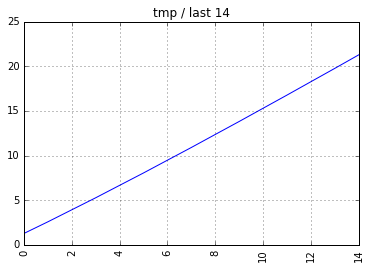

In [8]:
#  plot loggames against dataframe index, not depth:
plotn(df_loggames)

The plot produces a straight line, thus linear regression is appropriate.


## Regression

We find that ignoring low depth values in the computations
increases prediction accuracy.

In [9]:
#  Cut off some early points from linear regression:
start = 7

slope, intercept, r, p, stderr = scipy.stats.linregress(depth[start:], loggames[start:])

In [10]:
#  R^2
r**2

0.99995775431333844

Nearly perfect fit indicated by $R^2$ statistic.

In [11]:
slope

1.482020089256456

In [12]:
intercept

-0.95940122737613365

By mathematically rewriting our regression result,
we can now define our ***Python function for perft(depth)***:

In [13]:
def perft( d, b=slope, c=intercept ):
    '''Chess perft(d) given depth d and estimated regression parameters.'''
    return 10**((b*d) + c)

### Fit vs. actual

In [14]:
#  At each depth, COMPARE fitted vs. actual values:
for depth in range(1, 16):
    print(depth, perft(depth), games[depth-1])

1 3.33133925122 20.0
2 101.073883147 400.0
3 3066.61348007 8902.0
4 93042.0197909 197281.0
5 2822924.21365 4865609.0
6 85648410.6203 119060324.0
7 2598599780.44 3195901860.0
8 78842336594.4 84998978956.0
9 2.39210134875e+12 2.43953023417e+12
10 7.25771090747e+13 6.93528597124e+13
11 2.20201237058e+15 2.0976510037e+15
12 6.68097495479e+16 6.28549692367e+16
13 2.02702886427e+18 1.981066775e+18
14 6.15006947997e+19 6.18850215216e+19
15 1.86595046944e+21 2.01509995005e+21


For recent depths, the fit is remarkable good,
especially when the exponent portion is considered.
Some initial data points were omitted from the
regression analysis, however, the "backcasts"
are reasonable good given the huge range of games,
20 to $10^{21}$.
This gives us some confidence that the predictions
next are not unreasonable.

## Predictions

If linearity holds, we can extrapolate and make predictions.

In [15]:
#  PREDICTIONS
for depth in range(16, 31):
    print(depth, perft(depth))

16 5.66135255176e+22
17 1.71767221265e+24
18 5.21147164591e+25
19 1.58117692748e+27
20 4.79734064746e+28
21 1.45552827693e+30
22 4.41611868038e+31
23 1.33986433025e+33
24 4.06519061962e+34
25 1.23339165025e+36
26 3.74214915177e+37
27 1.13537985045e+39
28 3.44477826119e+40
29 1.04515658473e+42
30 3.17103802855e+43


## Conclusion

By using the logarthmic transform, linear regression
does an excellent job of giving functional form to perft(d) in chess:

$$ \it{perft}(d) = 10^{(bd + c)} $$

where $d$ is the depth, $b$ the fitted slope, and $c$ the intercept
as noted numerically above.

The last cell shows predicted values of forthcoming computations.